In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from IPython.display import Image
import sklearn.feature_selection
import scipy
#sns.set_theme(style="darkgrid")

In [11]:
# some global viewing options
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [12]:
# load in csv
url = 'https://github.gatech.edu/raw/mgacuzana3/cs4641_team48/master/data.csv?token=AAAIATLYHOTT5DEFMPTAJKS7VGYTQ'
df = pd.read_csv(url)

HTTPError: HTTP Error 404: Not Found

In [6]:
# one-hot races
df = pd.get_dummies(df, prefix = ['Race'], columns = ['Race_WhiteAfricanAmericanAsianHispanicLatinoOther'])

NameError: name 'df' is not defined

In [5]:
# separate heart rates
bp = df["BPadmit"].str.split("/", n = 1, expand = True) 
df['Systolic'] = bp[0]
df['Diastolic'] = bp[1]
df = df.drop('BPadmit', 'columns')

NameError: name 'df' is not defined

In [11]:
# one-hot sexes
df = pd.get_dummies(df, prefix = ['Sex'], columns = ['MF'])

NameError: name 'pd' is not defined

In [12]:
# rearranging columns
sys = df.pop('Systolic')
dia = df.pop('Diastolic')

df.insert(6, 'Systolic', sys)
df.insert(7, 'Diastolic', dia)

NameError: name 'df' is not defined

In [29]:
curr = df.pop('Race_White')
df.insert(11, 'Race_White', curr)

curr = df.pop('Race_Unknown')
df.insert(11, 'Race_Unknown', curr)

curr = df.pop('Race_Other')
df.insert(11, 'Race_Other', curr)

curr = df.pop('Race_Hispanic/Latino')
df.insert(11, 'Race_Hispanic/Latino', curr)

curr = df.pop('Race_Asian')
df.insert(11, 'Race_Asian', curr)

curr = df.pop('Race_African American')
df.insert(11, 'Race_African American', curr)

NameError: name 'df' is not defined

In [30]:
curr = df.pop('Sex_f')
df.insert(11, 'Sex_f', curr)

curr = df.pop('Sex_m')
df.insert(11, 'Sex_m', curr)

NameError: name 'df' is not defined

In [31]:
# change column types
df["Systolic"] = df["Systolic"].astype(str).astype(int)
df["Diastolic"] = df["Diastolic"].astype(str).astype(int)
df["Ferrit"] = df["Ferrit"].astype(str).astype(float)

NameError: name 'df' is not defined

In [32]:
sns.heatmap((df-df.min())/(df.max()-df.min()))

NameError: name 'df' is not defined

In [33]:
# standardization
standard = (df-df.min())/(df.max()-df.min())
corr = standard.corr()

NameError: name 'df' is not defined

In [34]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(40, 40))

plt.rc('xtick', labelsize=20)
# plt.rc('ytick', labelsize=20) 

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.set(font_scale=4)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

NameError: name 'corr' is not defined

In [35]:
# what's most correlated with death/icu
corr.iloc[-2].sort_values()

NameError: name 'corr' is not defined

## The Action Plan

1. Chi-Squared Test for categorical stuff - maybe better than just correlation for numerical/continuous values

[chisquared stackexchange](https://datascience.stackexchange.com/questions/893/how-to-get-correlation-between-two-categorical-variable-and-a-categorical-variab)

[wiki](https://en.wikipedia.org/wiki/Chi-squared_test)

[sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.chi2.html)

[more sklearn](https://scikit-learn.org/stable/auto_examples/text/plot_document_classification_20newsgroups.html?highlight=chi%20square)

2. PCA? doesn't tell us anything about feature selections because it combines stuff and makes it uninterpretable (not for feature selection) - maybe just with numerical values and drop categorical data
3. do correlation just with numerical data
4. Ask Vidisha about healthcare data (datasets???)
5. maybe GMM (latent data that probably came from 2 classes, allows us to look at discrepancies between classes) (or bernoulli mixture models for categoricals and compare with known gaussians), kmeans 
6. Pairplots between numericals (see if we can find any clusters visually)

for the future supervised part - Naive Bayes (posteriors of having a severe case)
[bernoulli naive bayes](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.BernoulliNB.html)

In [36]:
df.iloc[:,df.columns.get_loc('Num_COVID_Symptoms')].max()

NameError: name 'df' is not defined

In [37]:
pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', None)

In [38]:
barData = df.loc[:, 'Admitdxc19':'HTN'].join(df.loc[:, 'Troponin':'GroundglassCTchest']).join(df.loc[:, 'ARDS':'Sex_m'])

NameError: name 'df' is not defined

In [ ]:
barData = barData.drop(labels=['OnsetDays', 'Num_COVID_Symptoms'], axis ='columns')

In [ ]:
barData = barData.sum(0)
barData

In [ ]:
fig_dims = (50, 30)
fig, ax = plt.subplots(figsize=fig_dims)
plt.xticks(rotation = 90)
plt.xlabel("Category", size = 40, weight = 'bold')
plt.ylabel("Occurrences", size = 40, weight = 'bold')
plt.xticks(size = 40)
plt.yticks(size = 30)

sns.barplot(x = barData.index, y = barData, ax=ax)

In [ ]:
df

In [ ]:
# Harrison - pairplot cell
x = np.random.randn(1000, 3)
res = np.random.randint(low=0, high=2, size=(1000, 1))
print(x.shape)
print(res.shape)
x = np.concatenate((x, res), axis=1)
cols = np.array(["height", "weight", "factor", "res"])
idxs = np.arange(x.shape[0])
xdf = pd.DataFrame(x, idxs, cols)

plt.style.use('default')

sns.pairplot(xdf, hue="res")

In [ ]:
# display settings
pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 20)
# converting one-hot columns to unsigned 8bit ints (uint8)
df.loc[:,"Admitdxc19":"Num_Other_Risk_Factor":1] = df.loc[:,"Admitdxc19":"Num_Other_Risk_Factor":1].astype(str).astype('uint8')
df["OnsetDays"] = df["OnsetDays"].astype(str).astype('int64')
df["Num_COVID_Symptoms"] = df["Num_COVID_Symptoms"].astype(str).astype('int64')
df["Num_Other_Risk_Factor"] = df["Num_Other_Risk_Factor"].astype(str).astype('int64')

df.loc[:,"Troponin":"GroundglassCTchest":1] = df.loc[:,"Troponin":"GroundglassCTchest":1].astype(str).astype('uint8')
df.loc[:,"ARDS":"Died":1] = df.loc[:,"ARDS":"Died":1].astype(str).astype('uint8')

In [8]:
diedCol = pd.DataFrame(data=df['Death_ICU'], index=df.index, columns=['Death_ICU'])
# numerical columns
numericals = df.select_dtypes(exclude=['uint8'])
numericals = pd.concat((numericals, diedCol), axis=1)


# categorical columns
categoricals = df.select_dtypes(include=['uint8'])

NameError: name 'df' is not defined

In [9]:
numericals

NameError: name 'numericals' is not defined

In [ ]:
categoricals


In [ ]:
Ones = categoricals.sum()
Zeros = 116 - categoricals.sum()

In [ ]:
Ones

In [ ]:
Zeros

In [ ]:
categoricalFrequencies = pd.concat([Ones, Zeros], axis = 1)

In [ ]:
categoricalFrequencies.rename(columns={0: 'yes', 1: 'no'})

In [ ]:
expected = np.ones((66)) * 58

In [ ]:
expected

In [ ]:
expectedColumn = pd.DataFrame(data=expected)

In [ ]:
expectedColumn

In [ ]:
chiSquareMatrix = scipy.stats.chisquare(Ones, expectedColumn)

In [ ]:
statisticVals = chiSquareMatrix[0]

In [ ]:
pValues = chiSquareMatrix[1]

In [ ]:
pValues

In [ ]:
chiSquareIndependence = scipy.stats.chi2_contingency(Ones)

In [2]:
chiSquareIndependence = scipy.stats.chi2_contingency(Zeros)

NameError: name 'Zeros' is not defined

In [3]:
chiSquareIndependence

NameError: name 'chiSquareIndependence' is not defined

In [4]:
allColumns = list(categoricals)

NameError: name 'categoricals' is not defined

In [5]:
allColumns

NameError: name 'allColumns' is not defined

In [6]:
allColumns.remove('Death_ICU')
allColumns.remove('Died')
allColumns

NameError: name 'allColumns' is not defined

In [23]:
df = categoricals[allColumns]

NameError: name 'categoricals' is not defined

In [8]:
df

NameError: name 'df' is not defined

In [9]:
diedColumn = categoricals['Died']

NameError: name 'categoricals' is not defined

In [10]:
diedColumn

NameError: name 'diedColumn' is not defined

In [145]:
pValues = sklearn.feature_selection.chi2(df, diedColumn)[1]
chiSquareStatistics = sklearn.feature_selection.chi2(df, diedColumn)[0]
chiSquareStatistics

array([1.71428571e-01, 4.91803279e-02, 5.45454545e-02, 2.52525253e-01,
       1.33333333e+00, 2.33333333e+00, 1.11111111e-01, 1.77777778e+00,
       2.86549708e-01,            nan, 5.64971751e-03, 5.72108844e+00,
       7.89473684e+00, 2.06837607e+00, 1.77777778e+00, 8.57142857e-01,
       6.66666667e-01, 1.79487179e-01, 4.84848485e-01, 4.24561404e-01,
       1.25641026e+00, 1.11111111e-01, 5.23188406e+00, 3.70370370e+00,
       2.68817204e-01, 6.42222222e+00, 2.45454545e+00, 1.66666667e-01,
       6.06060606e-02, 0.00000000e+00, 1.77777778e+00,            nan,
       3.33333333e-01, 7.75193798e-03, 2.22222222e-01, 0.00000000e+00,
                  nan, 3.33333333e-01, 2.00000000e+00, 3.33333333e-01,
       6.66666667e-01, 3.33333333e-01, 6.66666667e-01, 5.55555556e-01,
       1.33333333e-01, 7.69230769e-02, 6.42222222e+00, 2.96969697e+00,
       4.15384615e+00, 1.34444444e+01, 2.77777778e+00, 3.00000000e+00,
       1.42857143e-01, 2.12121212e-01, 4.44444444e-03, 1.05633803e+00,
      

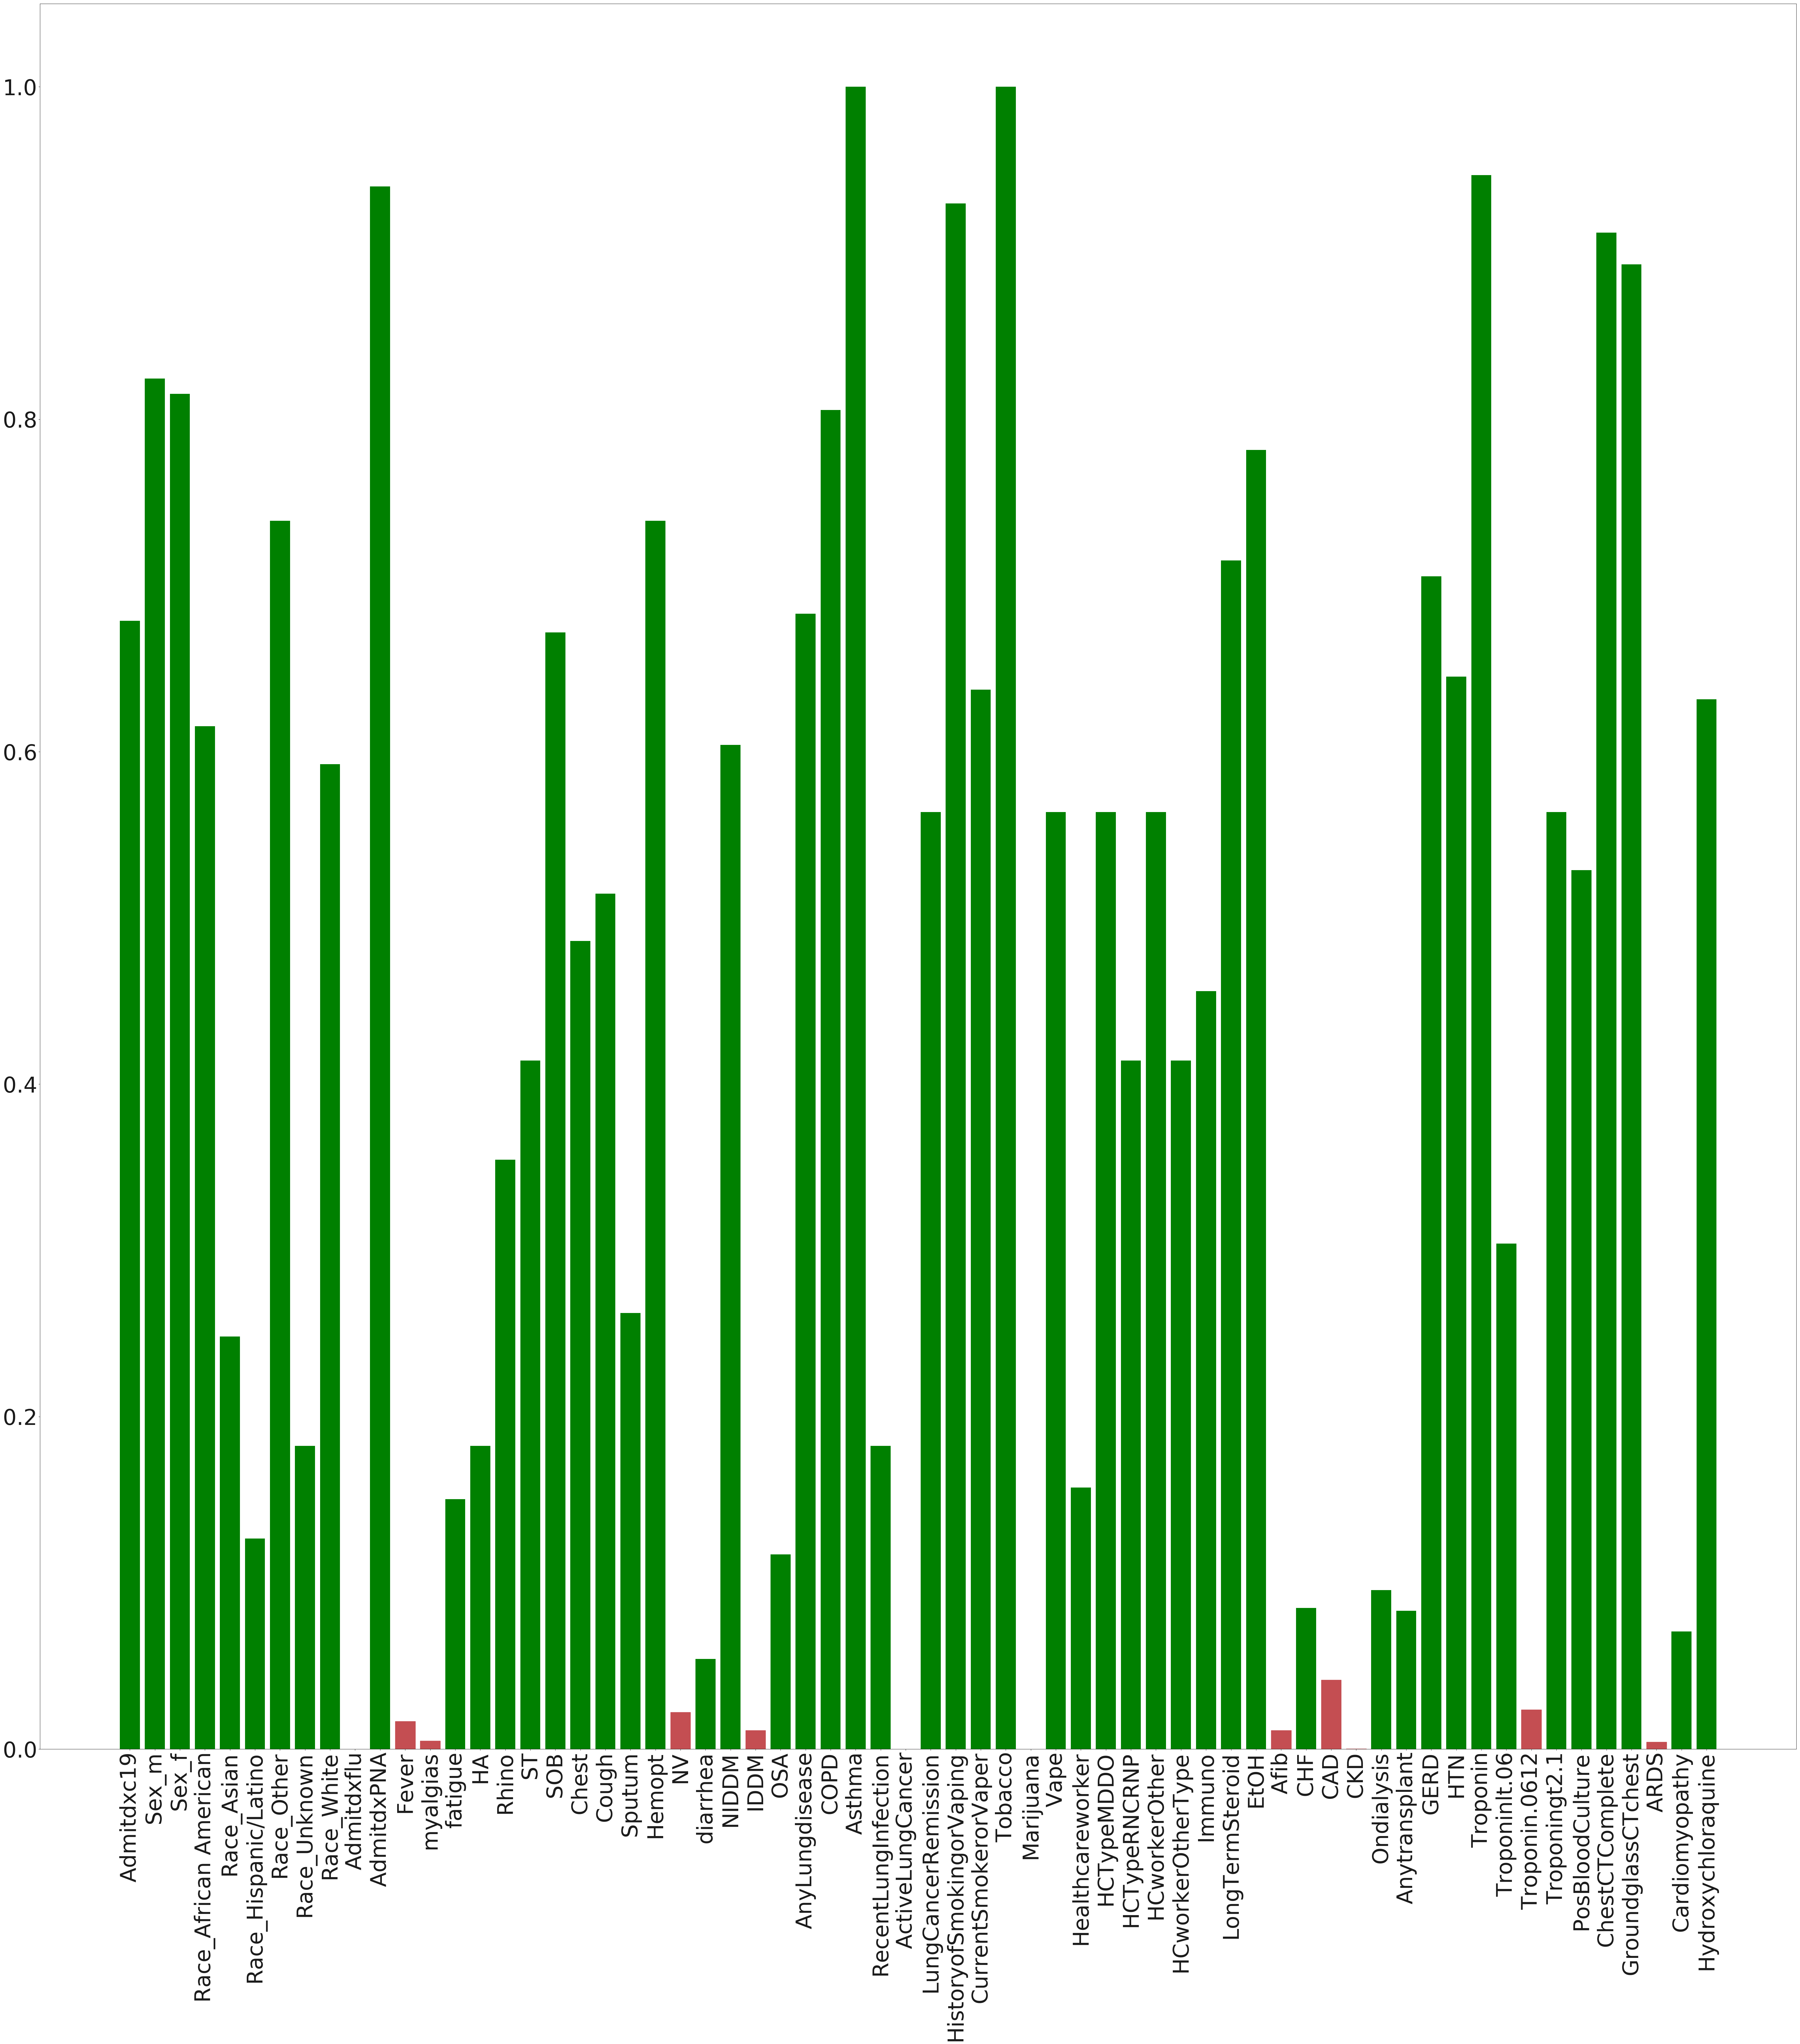

In [166]:
# #PVALUES
# i = 0
# while(i < 60):
#     plt.scatter(allColumns[i:i+5], pValues[i:i+5])
#     plt.xticks(rotation = 90)
#     plt.show()
#     i+=5
# plt.scatter(allColumns[60:], pValues[60:])
# plt.xticks(rotation = 90)
# plt.show()
f, ax = plt.subplots(figsize=(80,80))
barGraph = plt.bar(allColumns, pValues, color='green')  #pvalues
for x in range(len(allColumns)):
    if pValues[x] < 0.05:
        barGraph[x].set_color('r')
# barGraph[49].set_color('r')
# barGraph[61].set_color('r')
# barGraph[12].set_color('r')
# barGraph[25].set_color('r')
# barGraph[11].set_color('r')
# barGraph[22].set_color('r')
# barGraph[56].set_color('r')
# barGraph[48].set_color('r')
plt.xticks(rotation = 90)
plt.rcParams.update({'font.size':55})
plt.show()


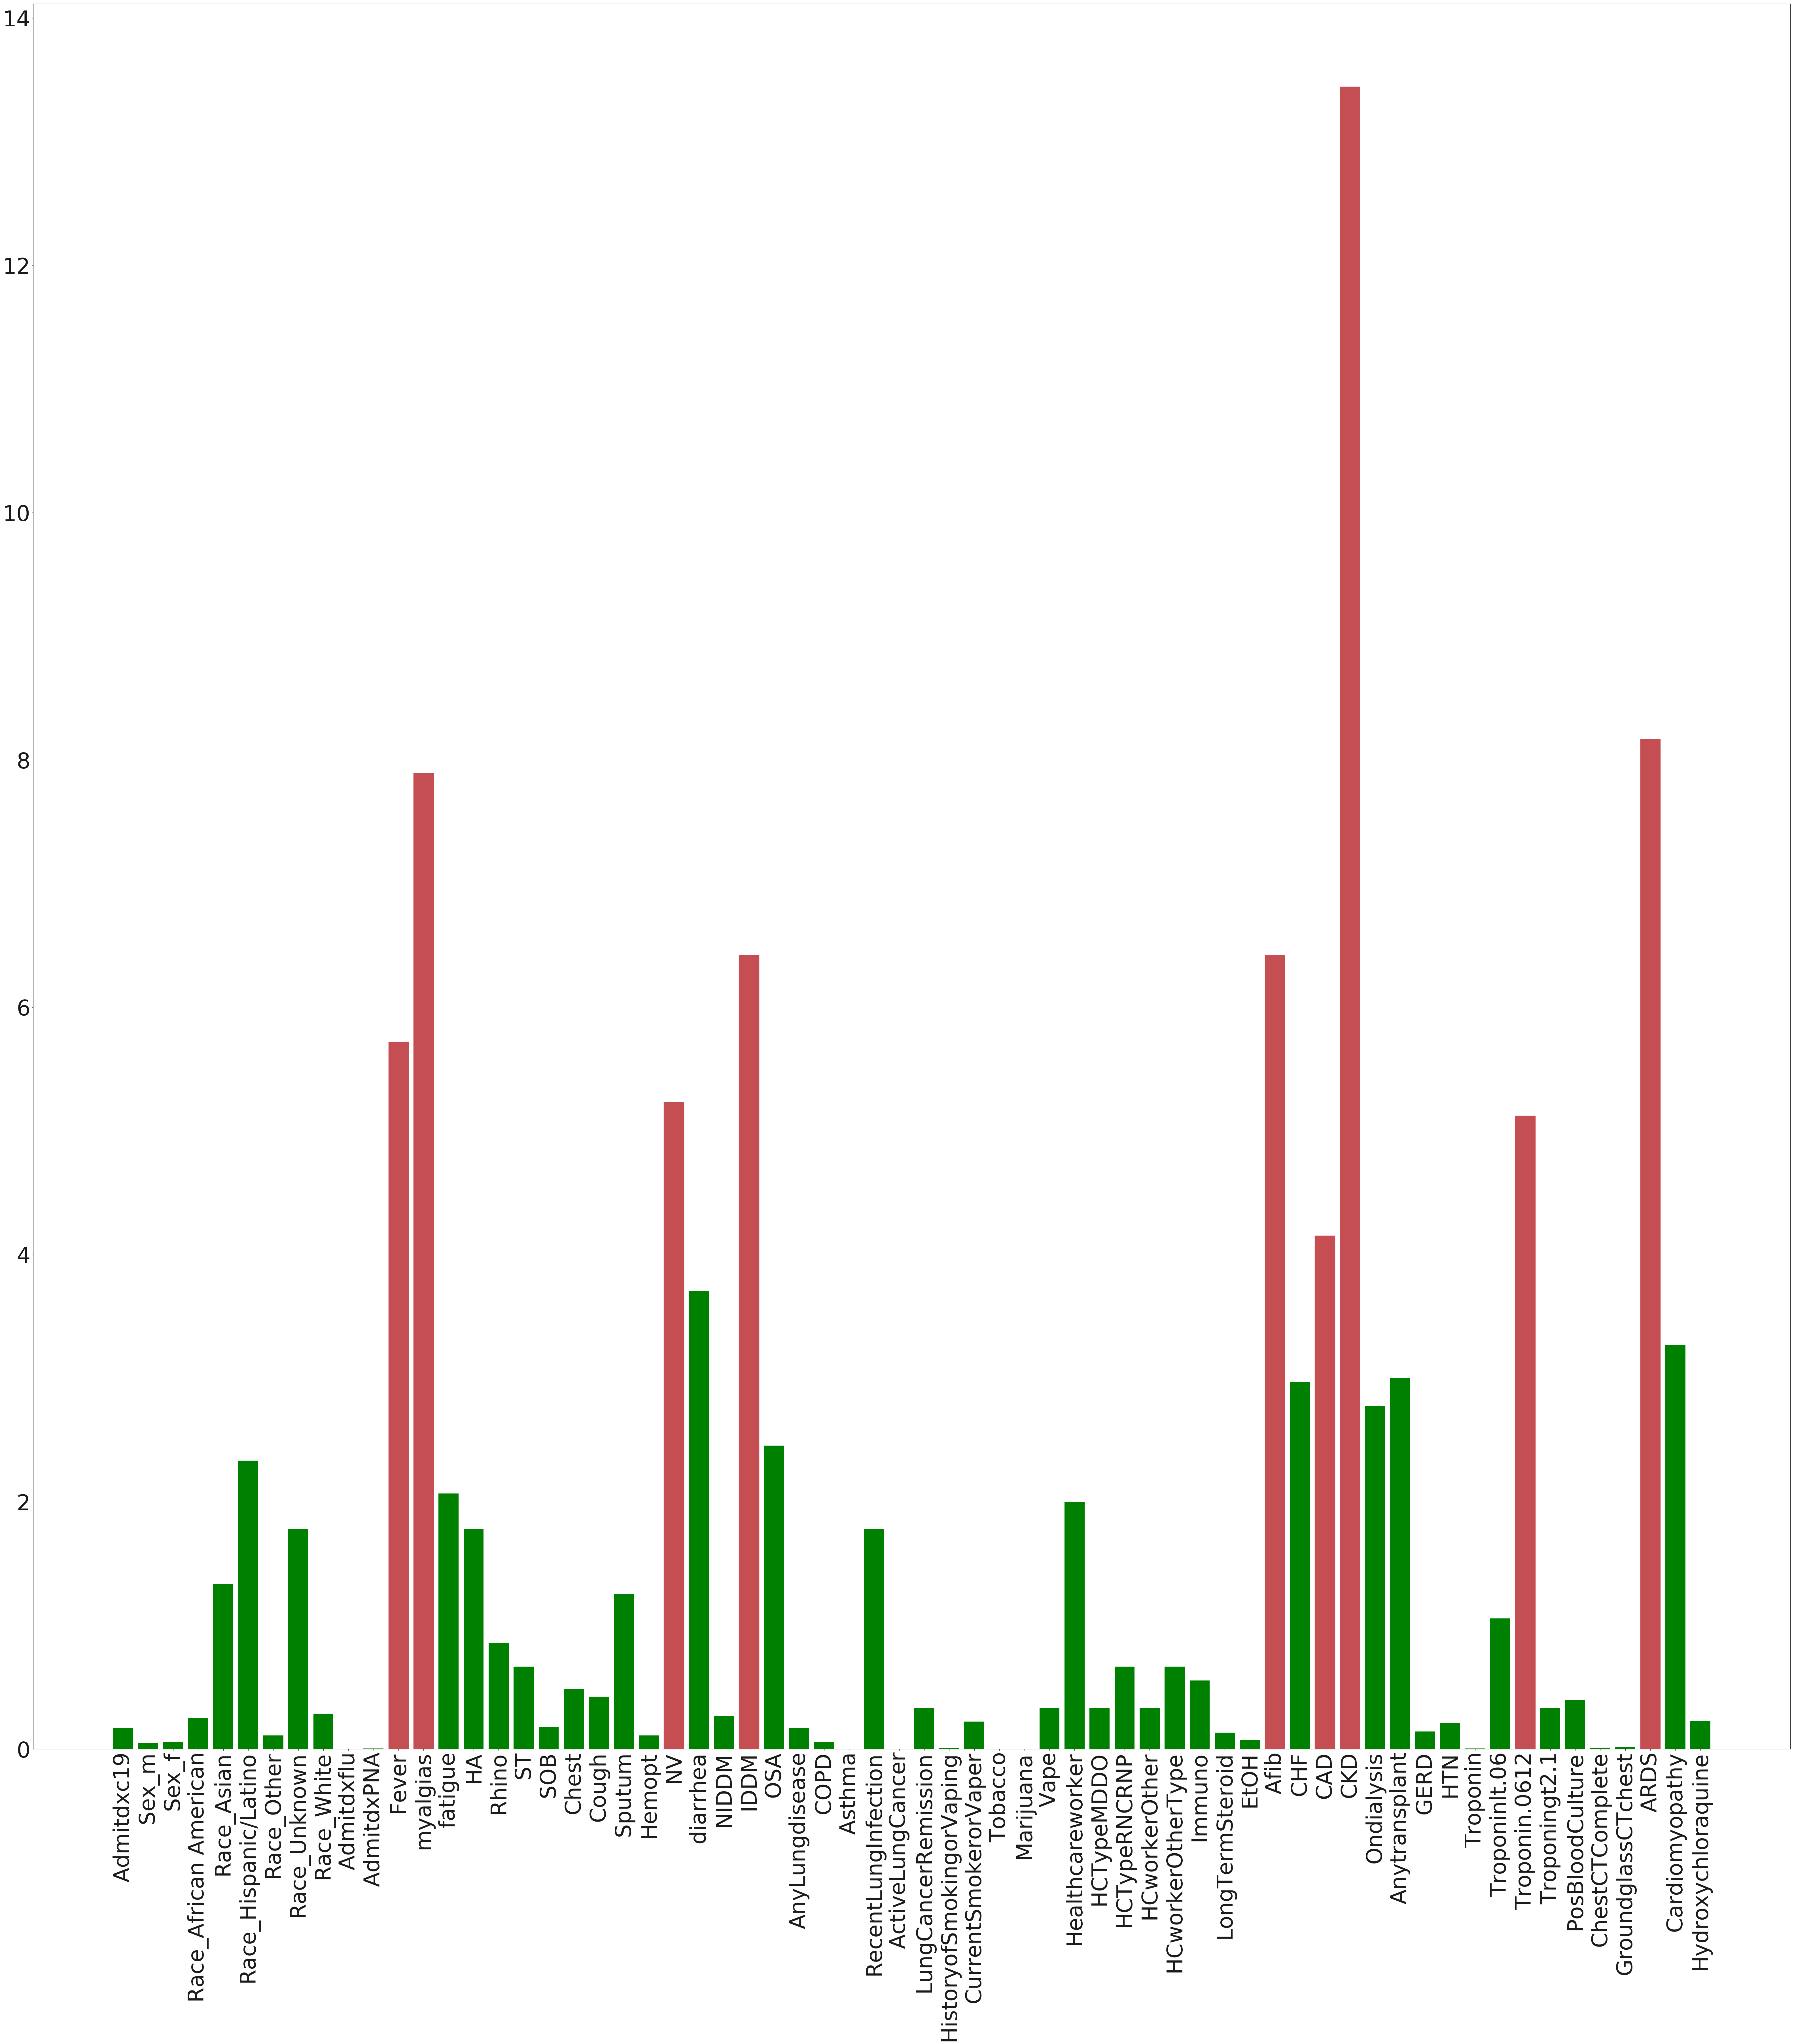

In [167]:
#CHISQUARE STATISTICS
# i = 0
# while(i < 60):
#     plt.bar(allColumns[i:i+5], chiSquareStatistics[i:i+5] , color='green')#(allColumns[i:i+5], chiSquareStatistics[i:i+5])
#     plt.xticks(rotation = 90)
#     plt.show()
#     i+=5
# #plot for last 4 attributes
# plt.scatter(allColumns[60:], chiSquareStatistics[60:])
# plt.xticks(rotation = 90)
# plt.show()
f, ax = plt.subplots(figsize=(80,80))
barGraph2 = plt.bar(allColumns, chiSquareStatistics, color='green')
for x in range(len(allColumns)):
    if pValues[x] < 0.05:
        barGraph2[x].set_color('r')
plt.xticks(rotation = 90)
plt.rcParams.update({'font.size':85})
plt.show()

In [112]:
chiSquareDict = {}
for i in range(64):
    chiSquareDict[allColumns[i]] = (chiSquareStatistics[i], pValues[i])
chiSquareDict


{'ARDS': (8.166666666666666, 0.004266724822176128),
 'ActiveLungCancer': (nan, nan),
 'AdmitdxPNA': (0.005649717514124294, 0.9400837475282023),
 'Admitdxc19': (0.17142857142857143, 0.6788452994243181),
 'Admitdxflu': (nan, nan),
 'Afib': (6.4222222222222225, 0.011270104849283227),
 'AnyLungdisease': (0.16666666666666666, 0.6830913983096086),
 'Anytransplant': (3.0, 0.08326451666355042),
 'Asthma': (0.0, 1.0),
 'CAD': (4.153846153846154, 0.041540067009885225),
 'CHF': (2.9696969696969697, 0.08483774479657069),
 'CKD': (13.444444444444445, 0.00024573277993030434),
 'COPD': (0.06060606060606061, 0.8055405886674938),
 'Cardiomyopathy': (3.2666666666666666, 0.07070114486598289),
 'Chest': (0.48484848484848486, 0.48623432138829725),
 'ChestCTComplete': (0.012121212121212121, 0.9123329418135505),
 'Cough': (0.4245614035087719, 0.5146697234497353),
 'CurrentSmokerorVaper': (0.2222222222222222, 0.6373518882339371),
 'EtOH': (0.07692307692307693, 0.7815112949987134),
 'Fever': (5.721088435374149

In [113]:
sorted(chiSquareDict, key=chiSquareDict.get, reverse = True)

['CKD',
 'Admitdxflu',
 'ARDS',
 'myalgias',
 'IDDM',
 'Fever',
 'ActiveLungCancer',
 'NV',
 'Troponin.0612',
 'CAD',
 'diarrhea',
 'Cardiomyopathy',
 'Anytransplant',
 'Ondialysis',
 'OSA',
 'Healthcareworker',
 'RecentLungInfection',
 'HA',
 'Race_Unknown',
 'Troponinlt.06',
 'Rhino',
 'Chest',
 'Cough',
 'PosBloodCulture',
 'LungCancerRemission',
 'HCworkerOther',
 'Race_White',
 'Hydroxychloraquine',
 'CurrentSmokerorVaper',
 'Admitdxc19',
 'GERD',
 'EtOH',
 'COPD',
 'AdmitdxPNA',
 'Troponin',
 'Asthma',
 'Marijuana',
 'Afib',
 'CHF',
 'Race_Hispanic/Latino',
 'fatigue',
 'Race_Asian',
 'Sputum',
 'HCTypeRNCRNP',
 'HCworkerOtherType',
 'ST',
 'Immuno',
 'Troponingt2.1',
 'HCTypeMDDO',
 'Vape',
 'NIDDM',
 'Race_African American',
 'HTN',
 'SOB',
 'AnyLungdisease',
 'LongTermSteroid',
 'Hemopt',
 'Race_Other',
 'Sex_f',
 'Sex_m',
 'GroundglassCTchest',
 'ChestCTComplete',
 'HistoryofSmokingorVaping',
 'Tobacco']

In [129]:
%%capture cap --no-stderr
sortedChiSquareDict = sorted(chiSquareDict.items(), key=lambda x: x[1], reverse=True)
print(sortedChiSquareDict)

with open('output.png', 'w') as f:
    f.write(cap.stdout)


In [130]:
sortedChiSquareDict

[('CKD', (13.444444444444445, 0.00024573277993030434)),
 ('Admitdxflu', (nan, nan)),
 ('ARDS', (8.166666666666666, 0.004266724822176128)),
 ('myalgias', (7.894736842105264, 0.004957885081270756)),
 ('IDDM', (6.4222222222222225, 0.011270104849283227)),
 ('Fever', (5.721088435374149, 0.016762336177186466)),
 ('ActiveLungCancer', (nan, nan)),
 ('NV', (5.231884057971015, 0.022176498204672247)),
 ('Troponin.0612', (5.121212121212121, 0.02363510198283392)),
 ('CAD', (4.153846153846154, 0.041540067009885225)),
 ('diarrhea', (3.7037037037037037, 0.05429182836685469)),
 ('Cardiomyopathy', (3.2666666666666666, 0.07070114486598289)),
 ('Anytransplant', (3.0, 0.08326451666355042)),
 ('Ondialysis', (2.7777777777777777, 0.09558070454562936)),
 ('OSA', (2.4545454545454546, 0.11718508719813815)),
 ('Healthcareworker', (2.0, 0.15729920705028105)),
 ('RecentLungInfection', (1.7777777777777777, 0.18242243945173198)),
 ('HA', (1.7777777777777777, 0.18242243945173198)),
 ('Race_Unknown', (1.777777777777777